# 주성분 분석 (PCA)

특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기법
 - 회전 후 데이터를 설명하는데 얼마나 중요한가에 따라 종종 새로운 특성 중 일부만 선택
 - 주로 데이터의 변수를 줄이고자 할 때 사용

기초 차원 축소 기법
 - decorrelation
 - reduces dimension

#### 주성분분석 알고리즘

알고리즘의 이해
 - 분산이 가장 클 방향을 찾음 좌상단
 - 주성분을 x, y 축에 나란하도록 회전 우상단
 - 가장 유용한 방향을 찾아 그 방향의 성분 주성분 을 유지 좌하단
 - 원래의 좌표 공간으로 복원 우하단

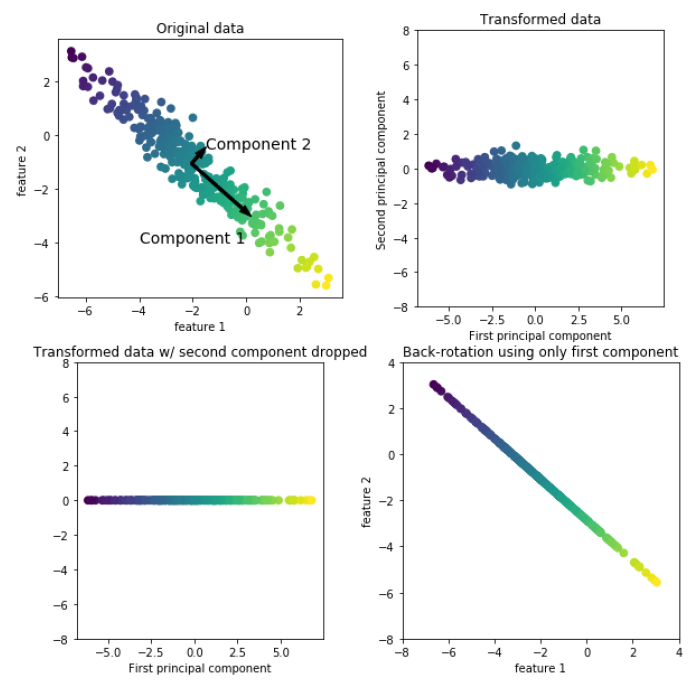

#### 특성의 유용함

유방암 데이터셋 클래스와 특성의 히스토그램을 살펴보면

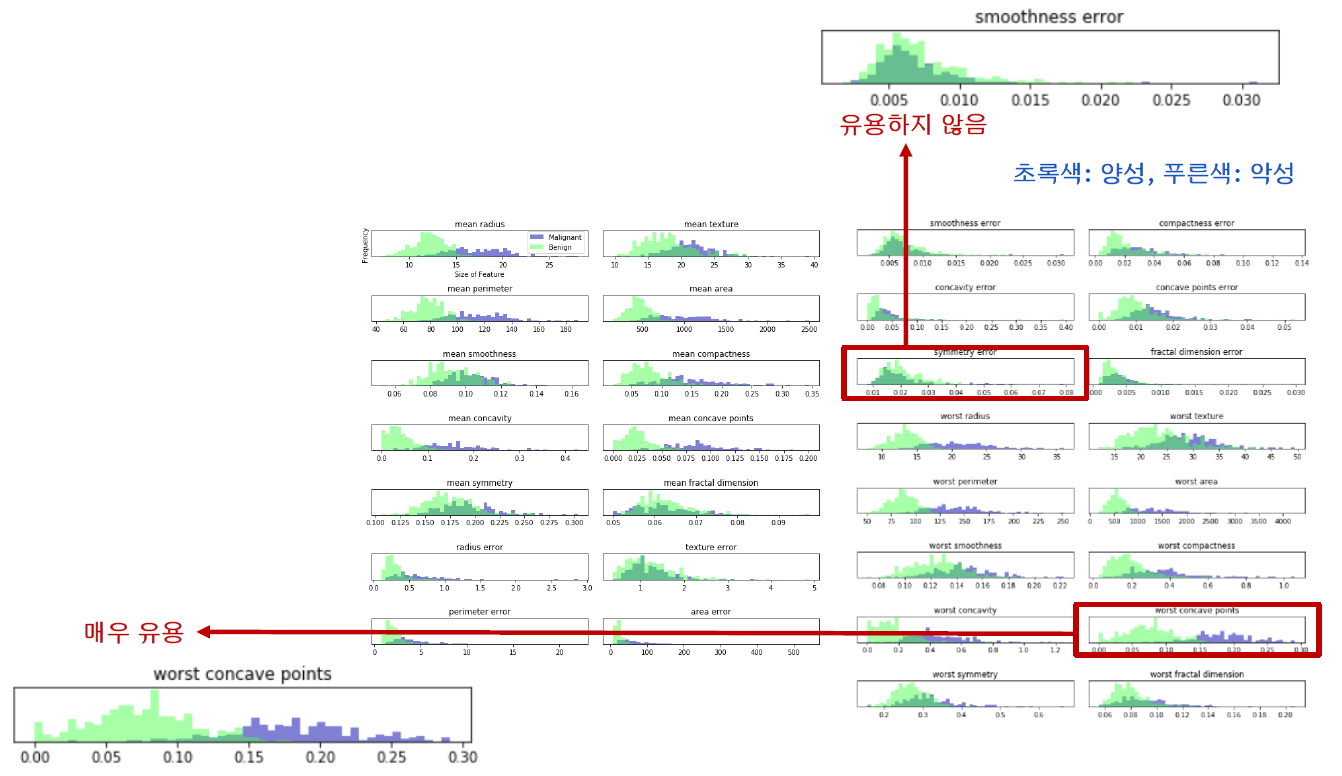

### PCA 변환을 통한 차원축소

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
# 스케일러
scaler = MinMaxScaler()
scaler.fit(cancer.data) # 라벨 없음
X_scaled = scaler.transform(cancer.data)

# PCA 모델 생성
pca = PCA(n_components=2) # 주성분을 2개를 유지
pca.fit(X_scaled) # 학습
X_pca = pca.transform(X_scaled)
print("원본 데이터의 형태:", X_scaled.shape)
print("축소된 데이터의 형태:", X_pca.shape)

원본 데이터의 형태: (569, 30)
축소된 데이터의 형태: (569, 2)


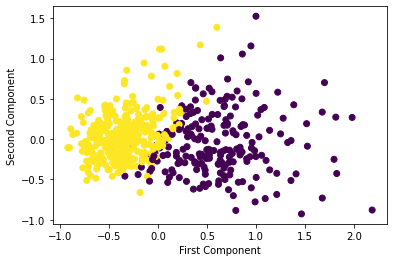

In [2]:
# 주성분의 시각화
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], # 첫번째 성분
           X_pca[:, 1], # 두번째 성분,
           c=cancer.target)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

In [3]:
# 컴포넌트의 목록 확인
print(pca.components_)
print(len(pca.components_[0])) # 첫 번째 컴포넌트

[[ 2.42675774e-01  9.64786101e-02  2.52550175e-01  2.16494530e-01
   1.09694618e-01  2.40397602e-01  3.01914206e-01  3.22475470e-01
   1.11431911e-01  4.32983397e-02  1.21760615e-01 -3.91796003e-05
   1.18580603e-01  1.03569266e-01 -4.68418094e-03  1.29319789e-01
   6.56807080e-02  1.24746120e-01  1.44902467e-02  4.55013416e-02
   2.59386850e-01  1.13833007e-01  2.60708399e-01  2.05917767e-01
   1.23773566e-01  2.04993413e-01  2.44083623e-01  3.71065064e-01
   9.59229054e-02  9.46335142e-02]
 [-2.61316697e-01 -5.90579194e-02 -2.38590061e-01 -2.31106830e-01
   1.99883951e-01  2.13914883e-01  1.13810591e-01 -8.31206237e-03
   2.11115126e-01  4.06392087e-01 -6.68985209e-02  6.00114468e-02
  -5.14164640e-02 -8.29631528e-02  1.35596439e-01  2.22352585e-01
   1.02792720e-01  1.05646780e-01  1.40474907e-01  1.71995173e-01
  -2.44281614e-01 -3.96817047e-02 -2.11635403e-01 -1.98979019e-01
   2.29454510e-01  1.98064332e-01  1.54982474e-01  4.43293805e-02
   1.51168839e-01  2.58092119e-01]]
30


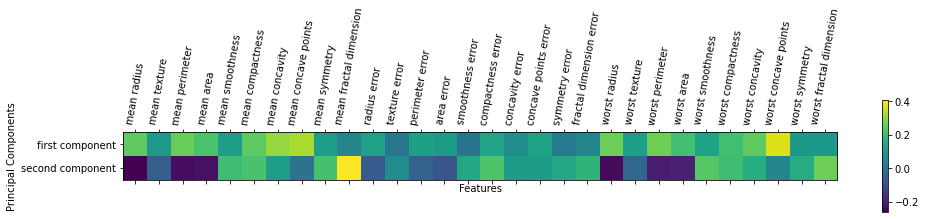

In [4]:
# 2개의 주 컴포넌트와 다른 피처들과의 관계
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation=80)
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()

# PCA 알고리즘은 변수의 갯수를 줄여서 연산량을 줄이는 효과

## 축소한 데이터 학습

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'],
    cancer['target'],
#     stratify=cancer.target,
    random_state=42
)

logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("LOGREG 훈련 세트 점수: {:.2f}".format(logreg.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

LOGREG 훈련 세트 점수: 0.96
LOGREG 테스트 세트 점수: 0.96


In [8]:
# 차원축소 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    cancer['target'],
#     stratify=cancer.target,
    random_state=42
)

logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("LOGREG 훈련 세트 점수: {:.2f}".format(logreg.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

LOGREG 훈련 세트 점수: 0.94
LOGREG 테스트 세트 점수: 0.95


#### - 서포트 벡터 머신 


In [10]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'],
    cancer['target'],
#     stratify=cancer.target,
    random_state=42
)

# Prefer dual=False when n_samples > n_features
svc = LinearSVC(dual=False, C=100)
svc.fit(X_train, y_train)

print("SVC 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

SVC 훈련 세트 점수: 0.98
SVC 테스트 세트 점수: 0.97


In [11]:
# 차원축소 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    cancer['target'],
#     stratify=cancer.target,
    random_state=42
)

svc = LinearSVC(dual=False, C=100)
svc.fit(X_train, y_train)

print("SVC 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

SVC 훈련 세트 점수: 0.94
SVC 테스트 세트 점수: 0.97
